In [1]:
from analysis_util import *

In [2]:
results = parse_real_results(save_dict=False, main_directory="./results_pertubation/results_real_data/")

In [4]:
aggregated_results = aggregate_real_results(results)
display(aggregated_results)

,surrogate,acquisition,seed,data,dist_nearest_train,inst_regret_test,inst_regret_pool,tot_regret_test,tot_regret_pool,std_change,calibration_mse,sharpness,x_opt_dist_test,x_opt_dist_pool
0,DE,EI,24,fashionmnist,0.736462,0.002035,0.000000,0.537488,0.331945,0.483,0.050523,0.715457,1.249993,0.000000
1,RF,EI,22,fashionmnist,0.758879,0.001586,0.002946,0.356665,0.493984,0.183,0.065018,0.959256,0.781628,2.581291
2,RF,EI,0,fashionmnist,1.194489,0.024750,0.022743,2.555224,2.352545,0.016,0.090586,3.657905,2.515363,0.348541
3,RF,EI,14,fashionmnist,1.035423,0.068931,0.069157,7.641208,7.664034,61.580,0.077414,-4.504412,2.539676,2.330127
4,DE,EI,26,fashionmnist,1.650235,0.012605,0.018007,4.198288,4.743895,23.360,0.062832,-3.105374,1.045392,2.490346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,RF,EI,18,svm_wine,0.164988,0.000000,0.000000,0.000000,0.000000,1.270,0.016280,6.824956,0.194702,3.186594
14396,RF,EI,16,svm_wine,0.157405,0.000000,0.000000,0.000000,0.000000,0.785,0.020258,10.225186,0.417214,3.171287
14397,BNN,EI,5,svm_wine,0.309278,0.000000,0.000000,0.000000,0.000000,8.860,0.053966,-0.695912,1.948988,2.649165
14398,BNN,EI,19,svm_wine,0.294388,0.000000,0.000000,0.000000,0.000000,5.460,0.081018,-0.142381,2.833810,0.387732


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
parsed_results = {'surrogate':[], 'std_change':[], 'calibration':[], 'inst_regret_pool':[], 'dist_nearest_train':[]}
for surrogate in set(aggregated_results['surrogate']):
    for std_change in set(aggregated_results['std_change']):
        selection = aggregated_results[(aggregated_results['surrogate']==surrogate) & (aggregated_results['std_change']==std_change) & (aggregated_results['acquisition']!="RS")]
        parsed_results['surrogate'].append(surrogate)
        parsed_results['std_change'].append(std_change)
        parsed_results['calibration'].append(selection['calibration_mse'].mean())
        parsed_results['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
        parsed_results['dist_nearest_train'].append(selection['dist_nearest_train'].mean())
df = pd.DataFrame.from_dict(parsed_results)
display(df)

,surrogate,std_change,calibration,inst_regret_pool,dist_nearest_train
0,DE,0.483,0.063732,0.001568,0.669411
1,DE,0.183,0.092819,0.001306,0.652236
2,DE,0.298,0.079810,0.001371,0.657432
3,DE,2.070,0.017102,0.002447,1.032660
4,DE,1.270,0.028422,0.001062,0.804769
...,...,...,...,...,...
75,BNN,61.580,0.050557,0.056355,0.878073
76,BNN,0.026,0.108712,0.015073,1.057506
77,BNN,0.016,0.108786,0.015073,1.057506
78,BNN,100.000,0.059281,0.057353,0.874249


/var/folders/pg/8kgknkg97zgbj393j1nl2gdh0000gn/T/ipykernel_31283/2587116781.py:18: UserWarning: You passed a edgecolor/edgecolors (39    black
37    black
36    black
32    black
29    black
33    black
21    black
22    black
20    black
27    black
24     none
23     none
26     none
25     none
28     none
30     none
31     none
34     none
35     none
38     none
Name: std_change, dtype: object) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax3.scatter(ECE,regret, marker=markers[i_s], color=colors[i_s], label=surrogate, edgecolor=limiter)
/var/folders/pg/8kgknkg97zgbj393j1nl2gdh0000gn/T/ipykernel_31283/2587116781.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/var/folders/pg/8kgknkg97zgbj393j1nl2gdh0000gn/T/ipykernel_31283/2587116781.py:25: UserWarning: Matplotlib is currently 

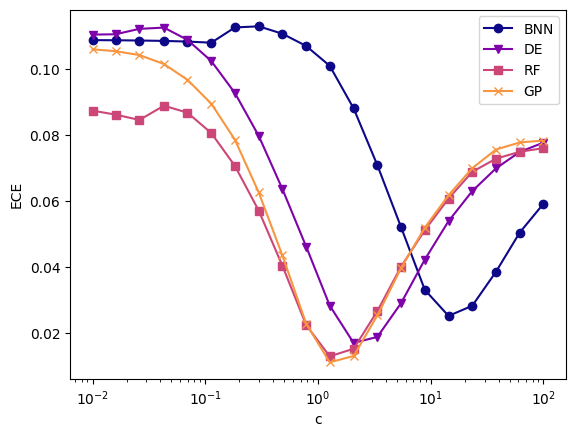

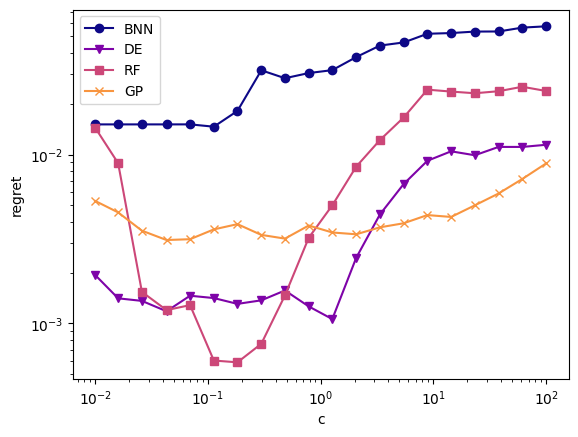

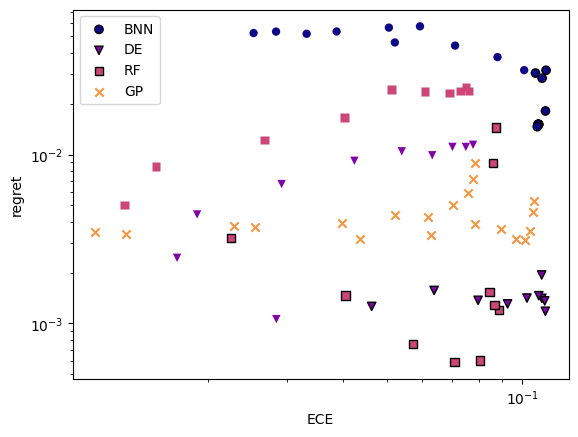

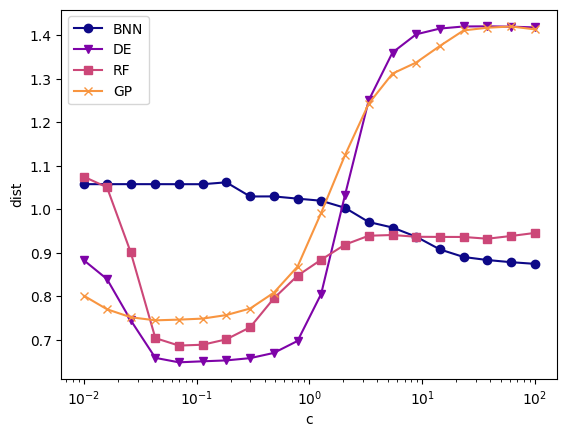

In [55]:
markers = ["o", "v", "s", "x", "d"]
colors = plt.cm.plasma(np.linspace(0, 1, len(markers)))
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
for i_s, surrogate in enumerate(set(df['surrogate'])):
    selection = df[df['surrogate']==surrogate]
    selection = selection.sort_values(by=['std_change'])
    c = selection['std_change']
    limiter = selection['std_change']<1
    limiter = limiter.apply(lambda x: 'black' if x else 'none')
    ECE = selection['calibration']
    regret = selection['inst_regret_pool']
    dist = selection['dist_nearest_train']
    ax1.plot(c, ECE, marker=markers[i_s], color=colors[i_s], label=surrogate)
    ax2.plot(c, regret, marker=markers[i_s], color=colors[i_s], label=surrogate)
    ax3.scatter(ECE,regret, marker=markers[i_s], color=colors[i_s], label=surrogate, edgecolor=limiter)
    ax4.plot(c, dist, marker=markers[i_s], color=colors[i_s], label=surrogate)
fig1.show()
ax1.set_ylabel("ECE")
ax1.set_xlabel("c")
ax1.set_xscale('log')
ax1.legend()
fig2.show()
ax2.set_ylabel("regret")
ax2.set_xlabel("c")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
fig3.show()
ax3.legend()
ax3.set_ylabel("regret")
ax3.set_xlabel("ECE")
ax3.set_xscale('log')
ax3.set_yscale('log')
fig4.show()
ax4.legend()
ax4.set_ylabel("dist")
ax4.set_xlabel("c")
ax4.set_xscale('log')

In [45]:
aggregated_results['std_change']<1

0         True
1         True
2         True
3        False
4        False
         ...  
14395    False
14396     True
14397    False
14398    False
14399     True
Name: std_change, Length: 14400, dtype: bool

In [23]:
display(parsed_results)

{'surrogate': ['DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'DE',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'GP',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'RF',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN',
  'BNN'],
 'std_change': [0.483,
  0.183,
  0.298,
  2.07,
  1.27,
  5.46,
  3.36,
  0.785,
  8.86,
  0.0695,
  14.38,
  23.36,
  0.043,
  0.113,
  37.93,
  61.58,
  0.026,
  0.016,
  100.0,
  0.01,
  0.483,
  0.183,
  0.298,
  2.07,
  1.27,
  5.46,
  3.36,
  0.785,
  8.86,
  0.0695,
  14.38,
  23.36,
  0.043,
  0.113,
  37.93,
  61.5

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
parsed_results = {'surrogate':[], 'std_change':[], 'calibration':[], 'inst_regret_pool':[], 'dist_nearest_train':[]}
for surrogate in set(aggregated_results['surrogate']):
    for std_change in set(aggregated_results['std_change']):
        selection = aggregated_results[(aggregated_results['surrogate']==surrogate) & (aggregated_results['std_change']==std_change) & (aggregated_results['acquisition']=="RS")]
        parsed_results['surrogate'].append(surrogate)
        parsed_results['std_change'].append(std_change)
        parsed_results['calibration'].append(selection['calibration_mse'].mean())
        parsed_results['inst_regret_pool'].append(selection['inst_regret_pool'].mean())
        parsed_results['dist_nearest_train'].append(selection['dist_nearest_train'].mean())
df = pd.DataFrame.from_dict(parsed_results)
display(df)

In [ ]:
#DONE: Check number of seeds run for synthetic experiment problems.
#DONE: Set over more synthetic experiment problems.
#DONE: Calculate ELPD for random sampled runs (at the end) for given surrogates. 
#Use above in regression analysis.
#Med regret: Lav figurer og tabeller med både inst. regret og tot. regret.